In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Last_Year = dt.date(2017, 8, 23) - dt.timedelta(days=7*52)

Last_Year




datetime.date(2016, 8, 24)

In [12]:
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > Last_Year).all()
results

[('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08',

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results)

df.columns =  results[0].keys()

df.set_index('date',inplace = True)

# Sort the dataframe by date

df_sorted = df.sort_values('date')

df_sorted.head(10)

,prcp
date,
2016-08-25,0.08
2016-08-25,0.00
2016-08-25,0.06
2016-08-25,0.00
2016-08-25,0.08
2016-08-25,0.11
2016-08-25,0.21
2016-08-26,0.00
2016-08-26,0.00


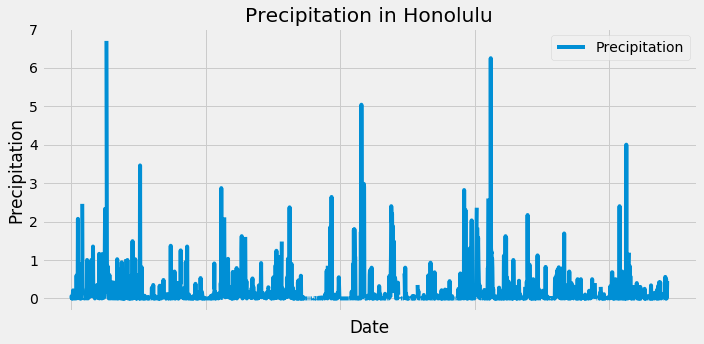

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data

# sns.set()

plot1 = df_sorted.plot(figsize = (10, 5))

fig = plot1.get_figure()

plt.title('Precipitation in Honolulu')

plt.xlabel('Date')

plt.ylabel('Precipitation')

plt.legend(["Precipitation"],loc="best")

plt.xticks(rotation=45)

plt.tight_layout()

# fig.savefig("../Images/Precipitation_Analysis.png")

plt.show()

In [15]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Summary_Stats_DF = df_sorted.describe()

Summary_Stats_DF.rename(columns = {'prcp' : 'Precipitation'})

,Precipitation
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [17]:
# Design a query to show how many stations are available in this dataset?
Number_of_Stations = session.query(Station.station).count()
 
print(f"Available Station(s): {Number_of_Stations}")

Available Station(s): 9


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
Active_Stations = session.query(Station.station,func.count(Measurement.tobs)).filter(Station.station == Measurement.station).\
                  group_by(Station.station).order_by(desc(func.count(Measurement.tobs))).all()


# List the stations and the counts in descending order.
print(f"{Active_Stations[0][0]} has {Active_Stations[0][1]} observations!")

Active_Stations

USC00519281 has 2772 observations!


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Station_Name = session.query(Station.name).filter(Station.station == Active_Stations[0][0]).all() 

print(Station_Name)

Temp_Stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
             filter(Station.station == Active_Stations[0][0]).all()

print(Temp_Stats)

[('WAIHEE 837.5, HI US',)]
[(53.0, 87.0, 73.09795396419437)]


In [20]:
# Choose the station with the highest number of temperature observations.


Station_Name = session.query(Station.name).filter(Station.station == Active_Stations[0][0]).all() 

print(Station_Name)

[('WAIHEE 837.5, HI US',)]


In [21]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results_WAIHEE = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > Last_Year).\
                            filter(Station.station == Active_Stations[0][0]).all()

results_WAIHEE_df = pd.DataFrame(results_WAIHEE)

results_WAIHEE_df.head()

,date,tobs
0,2016-08-25,80.0
1,2016-08-26,79.0
2,2016-08-27,77.0
3,2016-08-28,78.0
4,2016-08-29,78.0


![precipitation](Images/station-histogram.png)

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


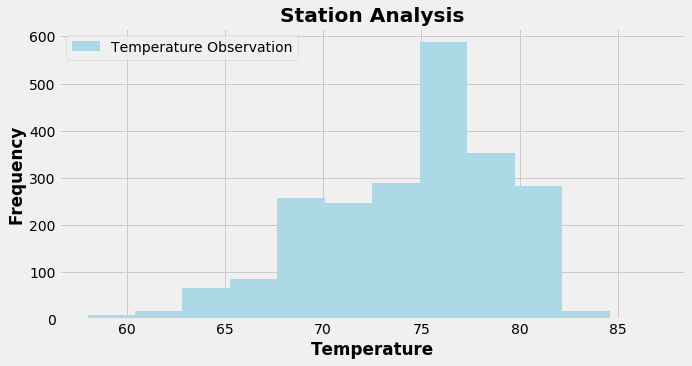

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# Plot the results as a histogram

# sns.set()

plt.figure(figsize=(10,5))

plt.hist(results_WAIHEE_df['tobs'],bins=12,color='lightblue')

plt.xlabel('Temperature',weight='bold')

plt.ylabel('Frequency',weight='bold')

plt.title('Station Analysis',weight='bold')

plt.legend(["Temperature Observation"],loc="best")

# plt.savefig("../Images/Temperature_Analysis.png")

plt.show()


In [25]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,\
              func.avg(Measurement.prcp)).\
        filter(Measurement.station==Station.station).\
        group_by(Measurement.station).\
        filter(Measurement.date > trip_start).\
        filter(Measurement.date < trip_end).\
        order_by(func.avg(Measurement.prcp).desc()).all()


NameError: name 'trip_start' is not defined